Install if needed

In [1]:
!pip install --upgrade google-auth-oauthlib

Requirement already up-to-date: google-auth-oauthlib in /opt/conda/lib/python3.7/site-packages (0.4.1)


Import the required libraries

In [3]:
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud import storage

import pandas as pd
import matplotlib.pyplot as plt

from dateutil.relativedelta import relativedelta


Create the client for the services account needed to access the bigquery storage in project "madonna-cloud-labpri-ctrlsenales"

In [4]:
# TODO(developer): Set key_path to the path to the service account key
#                  file.
key_path = "Credentials.json"

credentials = service_account.Credentials.from_service_account_file(
    key_path, scopes=["https://www.googleapis.com/auth/cloud-platform"],
)

client = bigquery.Client(credentials=credentials, project=credentials.project_id,)

Import the Data from bigquery

In [5]:
query = """
SELECT * FROM `mdona-cloud-labpri-ctrlsenales.DAN_PIC_Europe.PIC_TRACK_VARIABLES_PREP_CENTRALFRIO`;
        """
#client = bigquery.Client(location="EU", project="mdona-cloud-labpri-ctrlsenales")


query_job = client.query(query,location="EU") 

df_Central = query_job.to_dataframe()
df_Central.head()

,TS,ELEMENT,NAME_CENTRO,TAG_ALARMA,TAG_COMPRESOR1,TAG_COMPRESOR2,TAG_COMPRESOR3,TAG_COMPRESOR4,TAG_COMPRESOR5,TAG_COMPRESOR6,...,TAG_SETPOINT_COND,TAG_SONDA_ASP,TAG_SONDA_COND,TAG_SONDA_TEMP_EXT,TAG_SONDA_TEMP_SUBENF,TAG_VENTILADOR1,TAG_VENTILADOR2,TAG_VENTILADOR3,TAG_VENTILADOR4,TAG_VENTILADOR5
0,2020-01-28 21:23:00+00:00,74561,C3749 Gáldar Gáldar Las Palmas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-23 21:32:00+00:00,74561,C3749 Gáldar Gáldar Las Palmas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-24 23:00:05+00:00,74561,C3749 Gáldar Gáldar Las Palmas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.8,1.05,6.0,16.5,27.4,NaN,NaN,NaN,NaN,NaN
3,2020-01-25 07:56:00+00:00,74561,C3749 Gáldar Gáldar Las Palmas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-26 08:33:00+00:00,74561,C3749 Gáldar Gáldar Las Palmas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_Central['TS'] = df_Central['TS'].dt.tz_localize(None)

In [ ]:
df_Central = df_Central.groupby(['NAME_CENTRO',pd.Grouper(key='TS', freq='1s')]).mean().reset_index()

Check the columns types

Count the values of each column

In [ ]:
print(round(df_Central.isnull().mean()*100,2))

In [6]:
df_Central.count()

TS                        69378573
ELEMENT                   69378573
NAME_CENTRO               69378573
TAG_ALARMA                  399615
TAG_COMPRESOR1             7687444
TAG_COMPRESOR2             6427180
TAG_COMPRESOR3             4985071
TAG_COMPRESOR4             3651620
TAG_COMPRESOR5             1377845
TAG_COMPRESOR6             1028249
TAG_COMUNICA                804342
TAG_CONV_SETPOINT_ASP      2680103
TAG_CONV_SETPOINT_COND     4154564
TAG_CONV_SONDA_ASP        36865194
TAG_CONV_SONDA_COND       29700240
TAG_PASOMANUAL                 387
TAG_PASOMANUAL_AVERIA          246
TAG_PASOMANUAL_MTTO            134
TAG_POTENCIA_COMP1        12176954
TAG_POTENCIA_COMP2        10931779
TAG_POTENCIA_COMP3         9057282
TAG_POTENCIA_COMP4         7122721
TAG_POTENCIA_COMP5         2752475
TAG_POTENCIA_COMP6         2198476
TAG_POTENCIA_INVERTER      4132805
TAG_SETPOINT_ASP           1132973
TAG_SETPOINT_COND          1463037
TAG_SONDA_ASP             11680603
TAG_SONDA_COND      

In [9]:
df_Central2 =df_Central.drop(df_Central.loc[:,list((100*(df_Central.isnull().sum()/len(df_Central.index))>90))].columns, 1)
df_Central2.count()

TS                       69378573
ELEMENT                  69378573
NAME_CENTRO              69378573
TAG_COMPRESOR1            7687444
TAG_CONV_SONDA_ASP       36865194
TAG_CONV_SONDA_COND      29700240
TAG_POTENCIA_COMP1       12176954
TAG_POTENCIA_COMP2       10931779
TAG_POTENCIA_COMP3        9057282
TAG_POTENCIA_COMP4        7122721
TAG_SONDA_ASP            11680603
TAG_SONDA_COND           16906500
TAG_SONDA_TEMP_EXT       12217017
TAG_SONDA_TEMP_SUBENF    24979842
dtype: int64

In [1]:
cycles = df_merge['cycle_number'].unique()
print("the number of cycles: ",cycles.shape[0]) 
print(cycles) 
for i, val in enumerate(cycles):
    print("Location: ",val)
    df_loop = df_merge.loc[df_merge['cycle_number'] == (val)]
    print(df_loop['ELEMENT'].unique())
    print(df_loop["TS"].max()-df_loop["TS"].min())
    print("cantida de rows   ",df_loop.shape[0])


SyntaxError: unexpected EOF while parsing (<ipython-input-1-427f927eb661>, line 6)

In [11]:
cycles = df_Central2['NAME_CENTRO'].unique()
for i, val in enumerate(cycles):
    print("Location: ",val)
    df_loop = df_Central2.loc[df_Central2['NAME_CENTRO'] == (val)]
    print(round(df_loop.isnull().mean()*100,2),  '\n' )

Location:  C3749 Gáldar Gáldar Las Palmas
TS                        0.00
ELEMENT                   0.00
NAME_CENTRO               0.00
TAG_COMPRESOR1           90.07
TAG_CONV_SONDA_ASP       41.49
TAG_CONV_SONDA_COND      58.00
TAG_POTENCIA_COMP1       77.86
TAG_POTENCIA_COMP2       81.64
TAG_POTENCIA_COMP3       85.01
TAG_POTENCIA_COMP4       87.03
TAG_SONDA_ASP            94.83
TAG_SONDA_COND           87.02
TAG_SONDA_TEMP_EXT       88.84
TAG_SONDA_TEMP_SUBENF    66.83
dtype: float64 

Location:  C3731 Les Franqueses Les Franqueses Barcelona
TS                        0.00
ELEMENT                   0.00
NAME_CENTRO               0.00
TAG_COMPRESOR1           92.68
TAG_CONV_SONDA_ASP       52.05
TAG_CONV_SONDA_COND      59.31
TAG_POTENCIA_COMP1       88.26
TAG_POTENCIA_COMP2       89.21
TAG_POTENCIA_COMP3       91.41
TAG_POTENCIA_COMP4       90.25
TAG_SONDA_ASP            86.61
TAG_SONDA_COND           75.80
TAG_SONDA_TEMP_EXT       81.85
TAG_SONDA_TEMP_SUBENF    61.23
dtype: float64 


In [12]:
path = "gs://mdona-cloud-lab-ctrlsenales-bucket/PIC_TRACK_ALARMS.csv"
df_Alarms = pd.read_csv(path)

def Alarm_Detection( df_Alarms ):
    import pandas as pd

    df_Alarms = df_Alarms[df_Alarms['ID'] == 'Alarma Alta Temperatura en servicio']

    df_Alarms = df_Alarms[['IDEquipo']+['TS']+['Type']+['Equipo']+['Centro']+['IDCentro']+['IDZona']]



    df_Alarms = df_Alarms[df_Alarms['Equipo'].str.contains("Mural Carne|Mural Pescado")]

    df_Alarms.columns = ['ELEMENT', 'TS','ALTA_TEMPERATURA', 'Equipo', 'Centro', 'IDCentro', 'IDZona']




    #tranform the column TS to a datetime Object
    df_Alarms['TS'] = pd.to_datetime(df_Alarms['TS'], infer_datetime_format=True)

    first = df_Alarms['TS'].min()
    #Sort the values by the time
    df_Alarms = df_Alarms.sort_values(['ELEMENT','TS'], ascending=[ True, True]).reset_index(drop=True)

    #cols=list(df_Alarms.columns)

    #df_Alarms = df_Alarms[cols[0:2]+[cols[4]]]


    df_Alarms = df_Alarms.dropna().reset_index(drop=True)

    #papa pa paaaannnnnnnnnnnnnnnnnnnnnnnnnn
    #Check if the Begin was 'InhibitNotif' before the event occurred
    #Create a "new" column to indicate if it is an alarm or an alarm inhibited by user (on these cases it will have TRUE)

    for i, row  in df_Alarms.iterrows():
        if (df_Alarms.loc[i,'ALTA_TEMPERATURA']) =='Begin' and  (df_Alarms.loc[i-1,'ALTA_TEMPERATURA'])!='InhibitNotif':
            df_Alarms.at[i,'new'] = 'True'
        elif (df_Alarms.loc[i,'ALTA_TEMPERATURA']) =='Begin' and  (df_Alarms.loc[i-1,'ALTA_TEMPERATURA'])=='InhibitNotif':
            df_Alarms.at[i,'new'] = 'True but InhibitNotif by user'
        else:
            df_Alarms.at[i,'new'] = 'False'      

    df_InhibitAlarms = df_Alarms[df_Alarms['new'] == 'True but InhibitNotif by user']
    df_Alarms = df_Alarms[(df_Alarms['new'] == 'True') | (df_Alarms['new'] == 'True but InhibitNotif by user')]

    #df_Alarms = df_Alarms.drop('new', axis=1).reset_index(drop=True)
    df_Alarms = df_Alarms.sort_values(['ELEMENT','TS'], ascending=[ True, True]).reset_index(drop=True)

    #Check is the prior event occurred in a especific time
    '''

    for i in range(len(df_Alarms)):
        if i == 0: continue
        timedelta =((df_Alarms.loc[i,'TS'])-(df_Alarms.loc[i-1,'TS'])).days
        print("Es el mismo elemento que el anterior ", (df_Alarms.loc[i,'ELEMENT']) == (df_Alarms.loc[i-1,'ELEMENT']))
        print("Time Delta = ",timedelta)
    '''

    #Add a new column "new2" to indicate if there isn't any previous alarm in Days_before days
    #We discard the alarms that had another alarm in the Days_before previous days.
    
    for i, row  in df_Alarms.iterrows():
        Days_before = 11
        if i == 0:
            df_Alarms.at[i,'new2'] = 'True'
        elif (df_Alarms.loc[i,'ELEMENT']) == (df_Alarms.loc[i-1,'ELEMENT']):
            if ((df_Alarms.loc[i,'TS'])-(df_Alarms.loc[i-1,'TS'])).days >= Days_before:
                df_Alarms.at[i,'new2'] = 'True'
            else:
                df_Alarms.at[i,'new2'] = 'Too Short' 
        else:
            df_Alarms.at[i,'new2'] = 'True'

    df_Tooshort = df_Alarms[df_Alarms['new2'] == 'Too Short' ]
    

    
    df_Alarms = df_Alarms[df_Alarms['new'] == 'True']
    df_Alarms = df_Alarms[df_Alarms['new2'] == 'True']

    df_Alarms = df_Alarms.drop('new', axis=1).reset_index(drop=True)
    df_Alarms = df_Alarms.drop('new2', axis=1).reset_index(drop=True)
    df_Alarms = df_Alarms.sort_values(['ELEMENT','TS'], ascending=[ True, True]).reset_index(drop=True)

    #to check if the timedelta between the first event and the alarm is more than 15days 


    for i, row  in df_Alarms.iterrows():
        Days_From_beginning = 15
        if ((df_Alarms.loc[i,'TS'])-first).days >= Days_From_beginning:
            df_Alarms.at[i,'new'] = 'True'
        else:
            df_Alarms.at[i,'new'] = 'Not enough data' 

    df_Not_enough = df_Alarms[df_Alarms['new'] == 'Not enough data' ]

    

    df_Alarms = df_Alarms[df_Alarms['new'] == 'True']
    df_Alarms = df_Alarms.drop('new', axis=1).reset_index(drop=True)
    df_Alarms = df_Alarms.sort_values(['TS','ELEMENT'], ascending=[ True, True]).reset_index(drop=True)
    
    
    df_Alarms = df_Alarms.sort_values(['ELEMENT', 'TS'], ascending=[True, True]).reset_index(drop=True)
    
    #keep only the colums element, timestand and alarm
    df_Alarms = df_Alarms[['ELEMENT']+['TS']+['ALTA_TEMPERATURA']]
    
    
    #create a new row with a ten days prior the begin date
    for i in range(len(df_Alarms)):
        timeframe = df_Alarms.loc[i, 'TS'] - relativedelta(days=15)
        df_Alarms = df_Alarms.append({'TS':timeframe,'ELEMENT':(df_Alarms.loc[i, 'ELEMENT']),'ALTA_TEMPERATURA':'Start'}, ignore_index=True)
    
    df_Alarms = df_Alarms.sort_values(['ELEMENT', 'TS'], ascending=[True, True]).reset_index(drop=True)
    
    #create new column called cycle_number to difference the different cycles
    df_Alarms['cycle_number'] = df_Alarms['ALTA_TEMPERATURA'].map({'Start':0, 'Begin':1}).diff().lt(0).cumsum() + 1 
    df_Alarms= df_Alarms.drop(['ALTA_TEMPERATURA'], axis=1).reset_index(drop=True)

    
    return(df_Alarms)


#The function that apply the filter modifications to the dataset
df_Alarms = Alarm_Detection(df_Alarms)

In [19]:
elements_alarms= df_Alarms['ELEMENT'].unique()
print("Count of elements: ",len(df_Alarms['ELEMENT'].unique()))
print(elements_alarms)

Count of elements:  139
[ 29115  31002  31078  31134  31194  31545  31546  31548  31558  31689
  33556  33557  33558  43788  43789  44601  44602  44603  47353  49090
  49091  51140  51141  51143  53050  53051  53052  53053  53060  53061
  54695  54696  54781  54783  54784  54785  60269  60270  60271  60272
  60273  61394  61395  61407  68410  70950  71312  71313  71314  71315
  73666  74504  74715  74726  75214  75218  76733  76736  80504  80505
  81165  86175  87826  87827  87828  87829  87962  87964  87966  87967
  88221  88222  88224  88233  88234  89100  90398  90399  90400  90933
  91505  92055  92056  92057  92058  92059  92072  92073  92129  92201
  92323  92324  92325  92326  92327  92339  92340  92406  95992  96309
  98018  98021  99657  99658  99659  99660 100880 101359 101360 101361
 101362 102521 103396 103397 103398 105744 105745 105746 105747 105757
 105758 115853 119670 121643 129974 129990 130066 130166 130852 131573
 132240 132912 137791 140805 140806 142489 144545 144

In [7]:
query = """
SELECT
  ID_ELEMENT,
  ID_LOCATION,
  DESCRIPTION_LOCATION,
  
FROM
  `mdona-cloud-labpri-ctrlsenales.DAN_PIC_Europe.PIC_ELEMENT_LOCATION` 

  
        """
#client = bigquery.Client(location="EU", project="mdona-cloud-labpri-ctrlsenales")


query_job = client.query(query,location="EU") 

df_location = query_job.to_dataframe()
df_location.head()

,ID_ELEMENT,ID_LOCATION,DESCRIPTION_LOCATION
0,72333,72204,None
1,72394,72271,None
2,72381,72256,None
3,72382,72256,None
4,72399,72276,None


In [21]:
elements_total= df_location['ID_ELEMENT'].unique()
Location_total= df_location['ID_LOCATION'].unique()
print("Count of elements: ",len(elements_total))
print("Count of Locations: ",len(Location_total))

#print(elements_alarms)

Count of elements:  112153
Count of Locations:  2905


In [23]:
df_Alarms  = df_Alarms.merge(df_location, left_on='ELEMENT', right_on='ID_ELEMENT',  how='left').drop(['ID_ELEMENT'], 1)
df_Alarms

,ELEMENT,TS,cycle_number,ID_LOCATION
0,29115,2019-02-22 14:48:09,1,29100
1,29115,2019-03-09 14:48:09,1,29100
2,31002,2019-03-05 09:11:00,2,30998
3,31002,2019-03-20 09:11:00,2,30998
4,31078,2019-05-29 09:54:00,3,31061
...,...,...,...,...
311,144545,2020-03-30 00:45:00,155,144541
312,144630,2020-02-07 22:59:00,156,144625
313,144630,2020-02-22 22:59:00,156,144625
314,153705,2020-04-17 17:14:00,157,65423


In [25]:
elements_alarms= df_Alarms['ELEMENT'].unique()
Location_alarms= df_Alarms['ID_LOCATION'].unique()
print("Count of elements in alarms: ",len(elements_alarms))
print("Count of Locations in alarms: ",len(Location_alarms))

Count of elements in alarms:  139
Count of Locations in alarms:  66


import the locations of the variable dataset

In [26]:
path = "gs://mdona-cloud-lab-ctrlsenales-bucket/Elementsbylocaion148.csv"
df_variables = pd.read_csv(path)

In [27]:
elements_Variables= df_variables['ELEMENT'].unique()
Location_Variables= df_variables['ID_LOCATION'].unique()
print("Count of elements in alarms: ",len(elements_Variables))
print("Count of Locations in alarms: ",len(Location_Variables))

Count of elements in alarms:  149
Count of Locations in alarms:  72


In [30]:
print("this are the excluded elements from the variable with no alarms: " ,list(set(elements_Variables) - set(elements_alarms)))



this are the excuded elements with no alarms:  [139456, 31616, 31617, 121641, 109961, 134349, 31183, 64371, 87766, 51735, 51736, 51737, 51738, 31615]


In [ ]:
df_Central2  = df_Central.merge(df_location, left_on='NAME_CENTRO', right_on='DESCRIPTION_LOCATION',  how='left').drop(['DESCRIPTION_LOCATION'], 1)


Location_central= df_Central2['ID_LOCATION'].unique()
print("Count of Locations: ",len(Location_total))


In [ ]:
print("this are the excluded elements from the central de frio with no alarms: " ,list(set(Location_central) - set(Location_alarms)))


Drop the columns ['TAG_EQUIPO_STANDBY', 'TAG_COMUNICA','TAG_ALARMA']

In [9]:
#locations = df_Central['NAME_CENTRO'].unique()
#print(locations)
#print(locations.shape)

Join the row with the same timestamp 

In [11]:
df_Central

,NAME_CENTRO,TS,ELEMENT,TAG_ALARMA,TAG_COMPRESOR1,TAG_COMPRESOR2,TAG_COMPRESOR3,TAG_COMPRESOR4,TAG_COMPRESOR5,TAG_COMPRESOR6,...,TAG_SETPOINT_COND,TAG_SONDA_ASP,TAG_SONDA_COND,TAG_SONDA_TEMP_EXT,TAG_SONDA_TEMP_SUBENF,TAG_VENTILADOR1,TAG_VENTILADOR2,TAG_VENTILADOR3,TAG_VENTILADOR4,TAG_VENTILADOR5
0,C2010 Av. Del Parque Lucena Córdoba,2018-12-14 00:00:54,31049.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.42,NaN,10.9,18.000000,NaN,NaN,NaN,NaN,NaN
1,C2010 Av. Del Parque Lucena Córdoba,2018-12-14 00:01:34,31049.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C2010 Av. Del Parque Lucena Córdoba,2018-12-14 00:01:55,31049.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C2010 Av. Del Parque Lucena Córdoba,2018-12-14 00:02:17,31049.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C2010 Av. Del Parque Lucena Córdoba,2018-12-14 00:02:55,31049.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66115192,C7005 Vermoim Maia Porto,2020-05-31 23:52:02,119749.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.4,1.10,5.4,17.6,23.200001,NaN,NaN,NaN,NaN,NaN
66115193,C7005 Vermoim Maia Porto,2020-05-31 23:53:00,119749.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.1,NaN,22.700001,NaN,NaN,NaN,NaN,NaN
66115194,C7005 Vermoim Maia Porto,2020-05-31 23:55:00,119749.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66115195,C7005 Vermoim Maia Porto,2020-05-31 23:57:00,119749.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


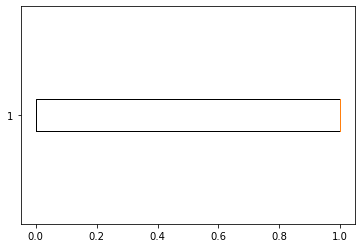

TAG_ALARMA


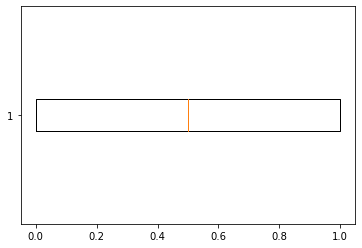

TAG_COMPRESOR1


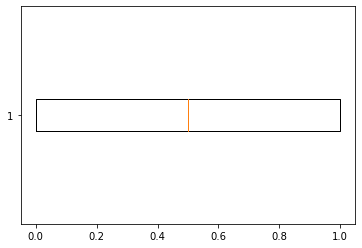

TAG_COMPRESOR2


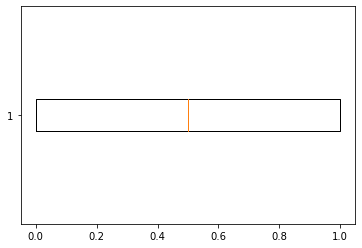

TAG_COMPRESOR3


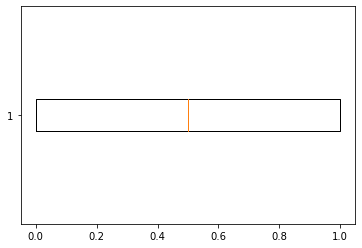

TAG_COMPRESOR4


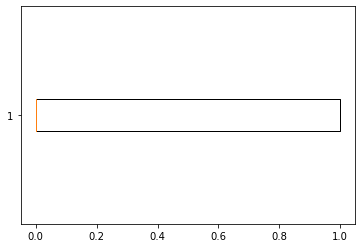

TAG_COMPRESOR5


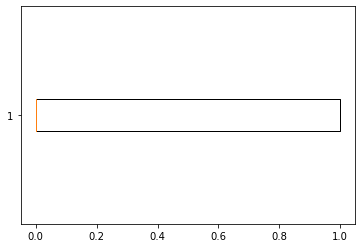

TAG_COMPRESOR6


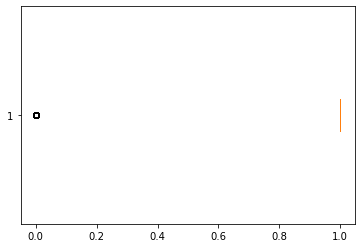

TAG_COMUNICA


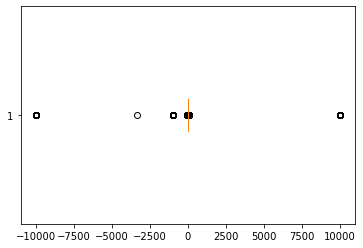

TAG_CONV_SETPOINT_ASP


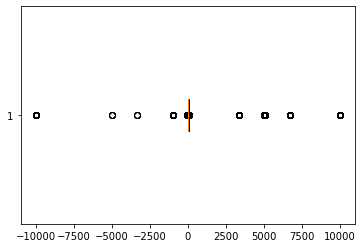

TAG_CONV_SETPOINT_COND


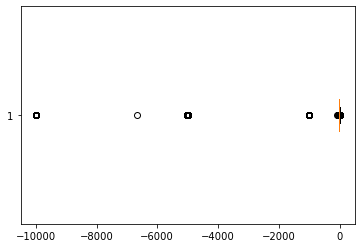

TAG_CONV_SONDA_ASP


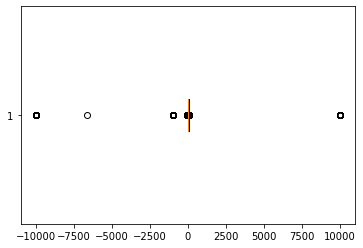

TAG_CONV_SONDA_COND


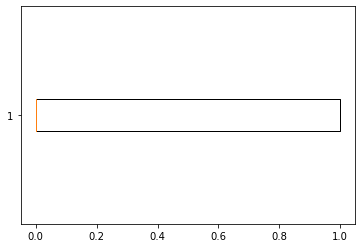

TAG_PASOMANUAL


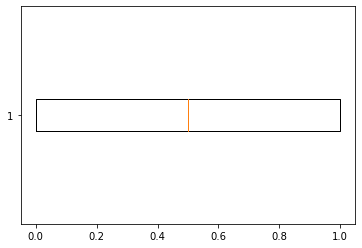

TAG_PASOMANUAL_AVERIA


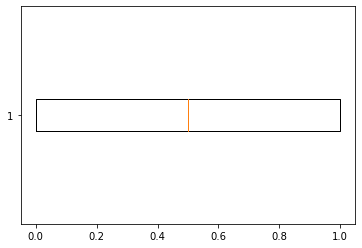

TAG_PASOMANUAL_MTTO


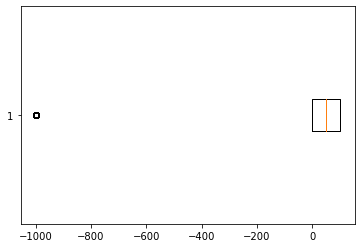

TAG_POTENCIA_COMP1


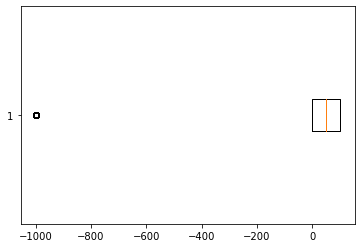

TAG_POTENCIA_COMP2


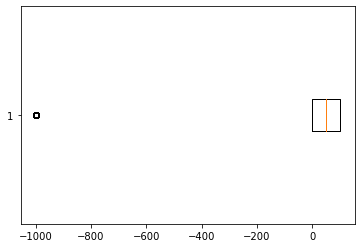

TAG_POTENCIA_COMP3


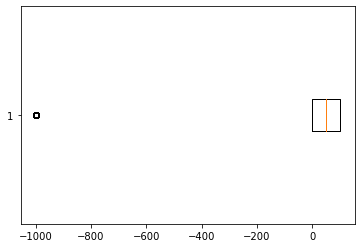

TAG_POTENCIA_COMP4


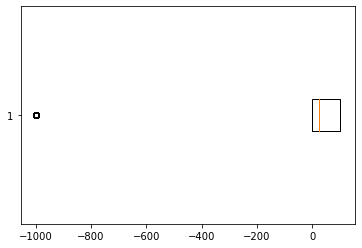

TAG_POTENCIA_COMP5


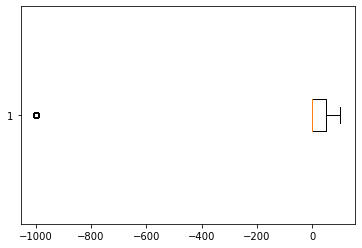

TAG_POTENCIA_COMP6


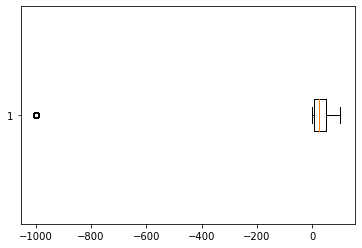

TAG_POTENCIA_INVERTER


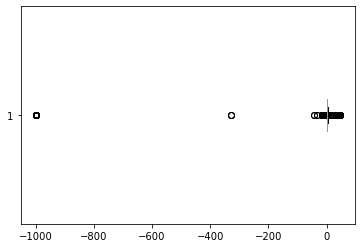

TAG_SETPOINT_ASP


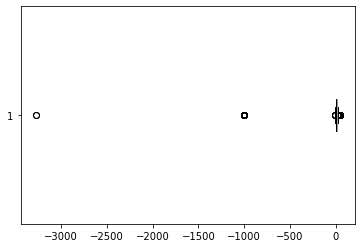

TAG_SETPOINT_COND


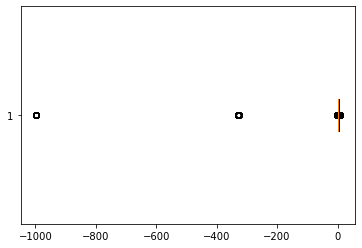

TAG_SONDA_ASP


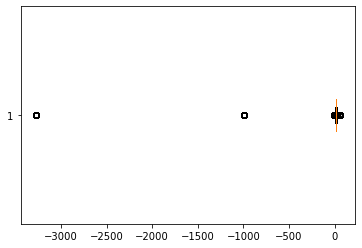

TAG_SONDA_COND


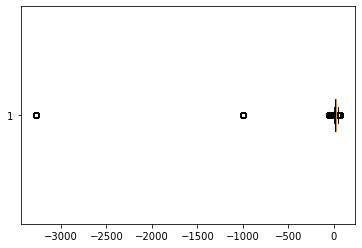

TAG_SONDA_TEMP_EXT


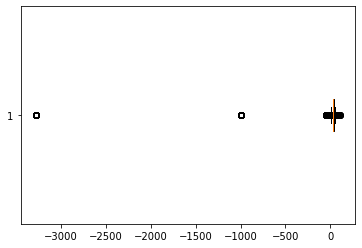

TAG_SONDA_TEMP_SUBENF


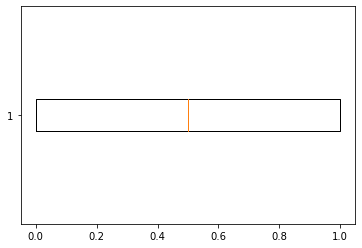

TAG_VENTILADOR1


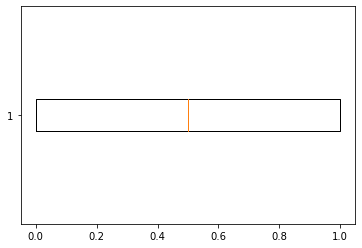

TAG_VENTILADOR2


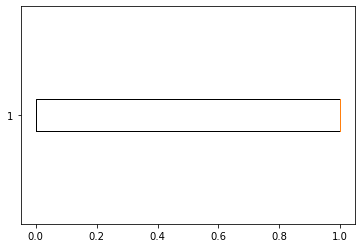

TAG_VENTILADOR3


In [12]:
#load the colums in a dataframe


cols=list(df_Central.columns)

# Drawing the plots
i=3
while i <= (len(cols) - 3):
        
    plt.boxplot(df_Central[cols[i]].dropna(), vert=False)
    
    plt.show()
    
      

#    plt.pause(0.001)

    # add to iteration counter
    i += 1

    print(cols[i-1])

TAG_ALARMA


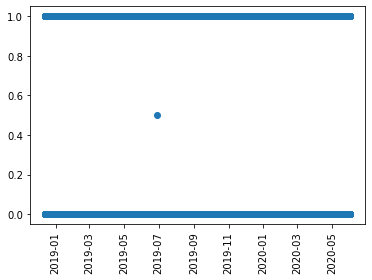

TAG_COMPRESOR1


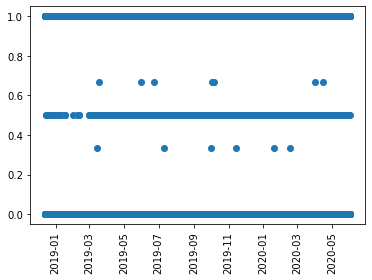

TAG_COMPRESOR2


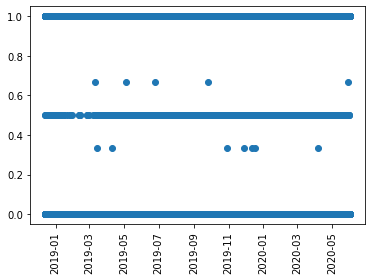

TAG_COMPRESOR3


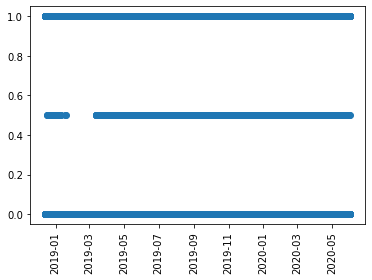

TAG_COMPRESOR4


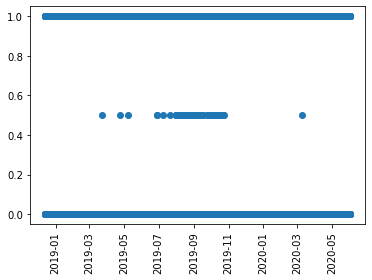

TAG_COMPRESOR5


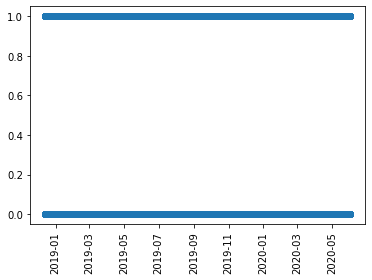

TAG_COMPRESOR6


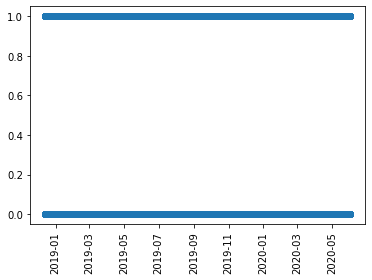

TAG_COMUNICA


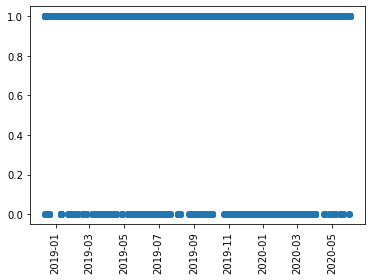

TAG_CONV_SETPOINT_ASP


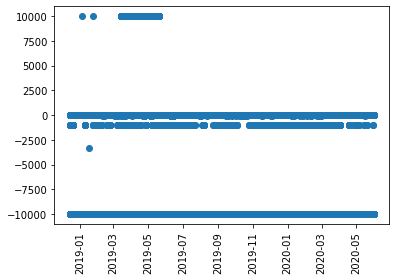

TAG_CONV_SETPOINT_COND


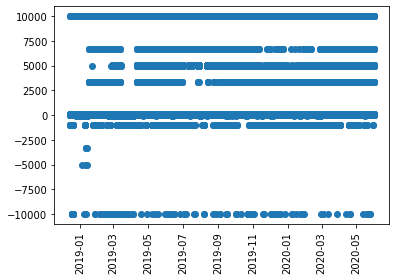

TAG_CONV_SONDA_ASP


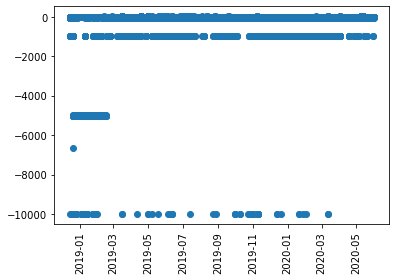

TAG_CONV_SONDA_COND


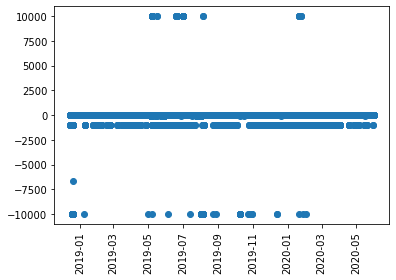

TAG_PASOMANUAL


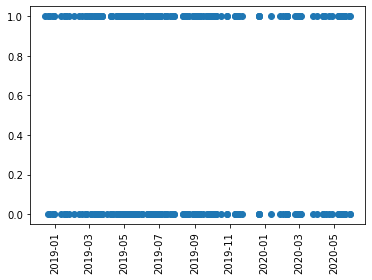

TAG_PASOMANUAL_AVERIA


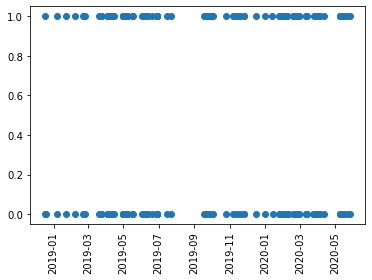

TAG_PASOMANUAL_MTTO


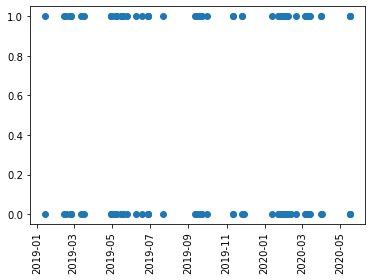

TAG_POTENCIA_COMP1


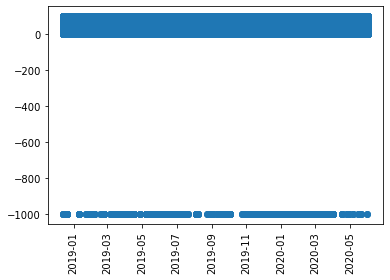

TAG_POTENCIA_COMP2


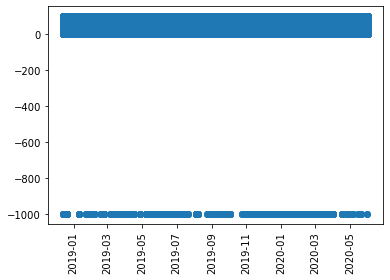

TAG_POTENCIA_COMP3


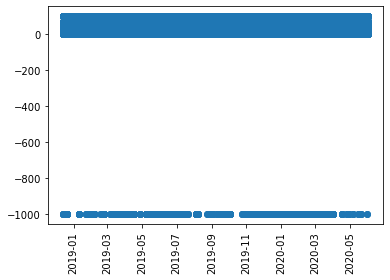

TAG_POTENCIA_COMP4


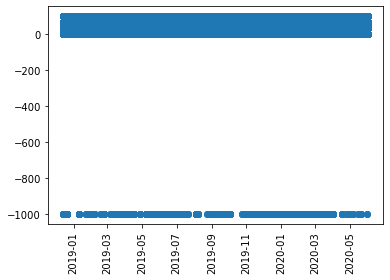

TAG_POTENCIA_COMP5


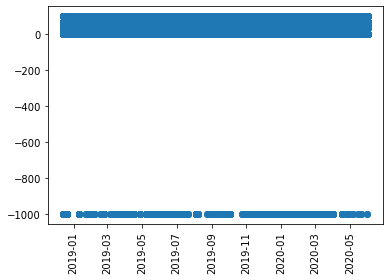

TAG_POTENCIA_COMP6


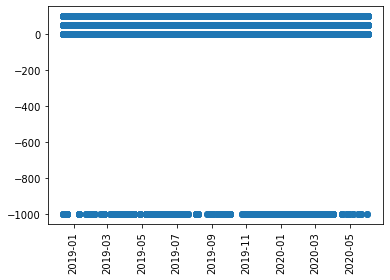

TAG_POTENCIA_INVERTER


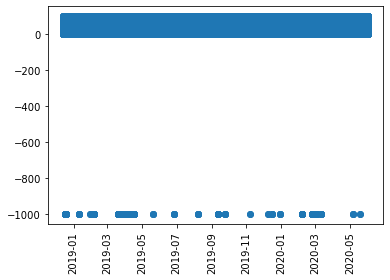

TAG_SETPOINT_ASP


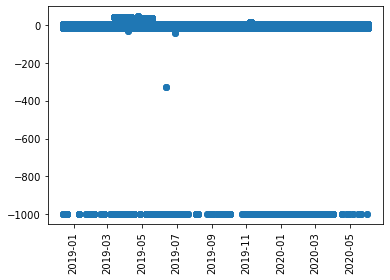

TAG_SETPOINT_COND


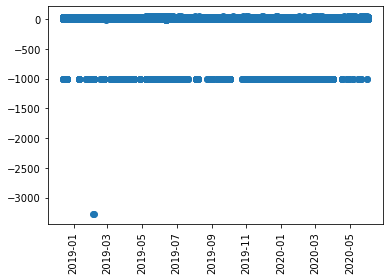

TAG_SONDA_ASP


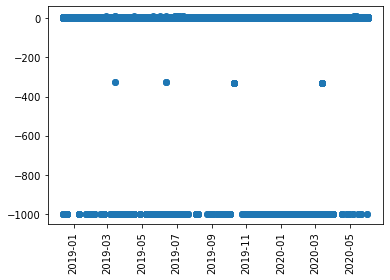

TAG_SONDA_COND


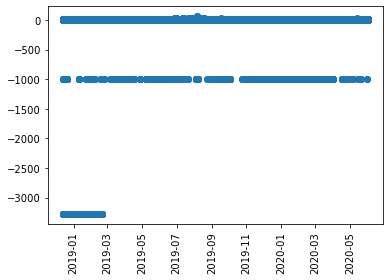

TAG_SONDA_TEMP_EXT


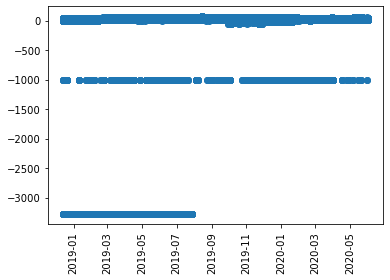

TAG_SONDA_TEMP_SUBENF


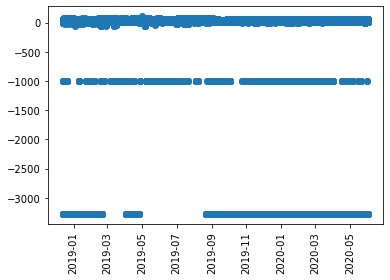

TAG_VENTILADOR1


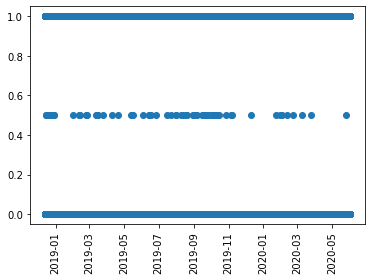

TAG_VENTILADOR2


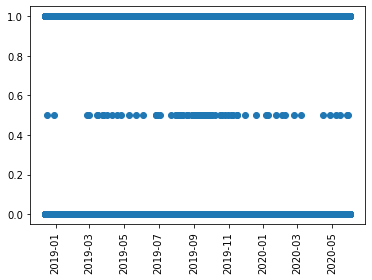

TAG_VENTILADOR3


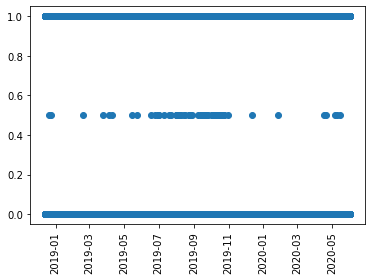

In [14]:
import os
# Draw the plot_date with 
#mask = df_Variables.loc[(df_Variables['TS'] > '2019-07-11 00:00:00') & (df_Variables['TS'] <= '2019-07-11 23:00:00')]
#mask= mask.loc[(mask['ELEMENT'] == (elements[j]))]
#mask['TAG_SONDA_PB1'] = mask['TAG_SONDA_PB1'].interpolate()

mask = df_Central
mask = mask.sort_values('TS')

plt.xticks(rotation=90)

#load the colums in a dataframe
cols=list(df_Central.columns)

#Path
#mypath= os.path.abspath(__file__)
mypath = os.getcwd()

# Drawing the plots
i=3
while i <= (len(cols) - 3):
        
#    plt.plot_date(df_Variables[cols[i]].dropna(), vert=False)
    print(cols[i])
    plt.plot_date(mask['TS'], mask[cols[i]])
    plt.xticks(rotation=90)
    plt.show()
    # add to iteration counter
    i += 1

    

TAG_ALARMA


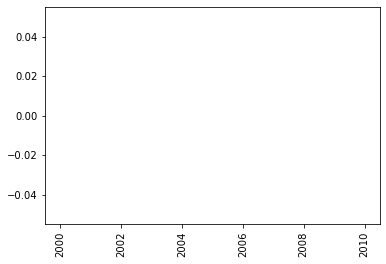

TAG_COMPRESOR1


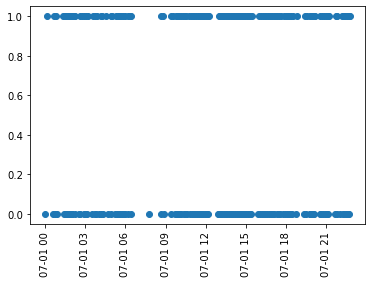

TAG_COMPRESOR2


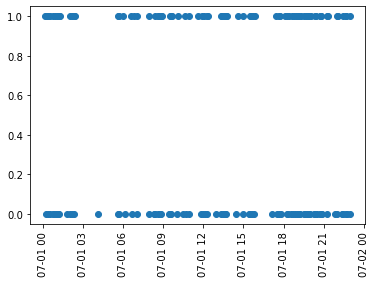

TAG_COMPRESOR3


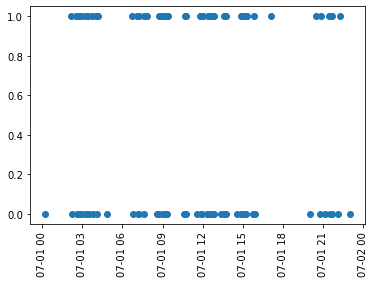

TAG_COMPRESOR4


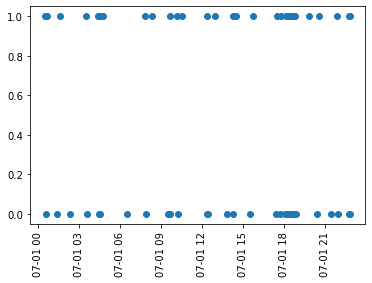

TAG_COMPRESOR5


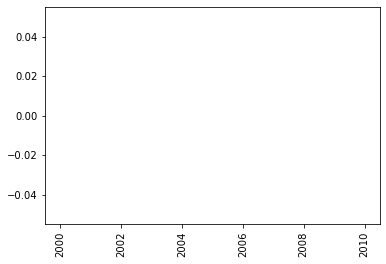

TAG_COMPRESOR6


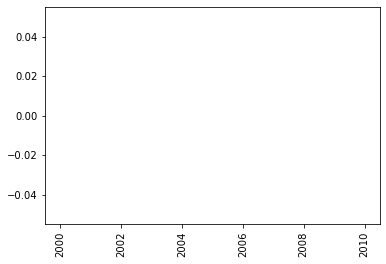

TAG_COMUNICA


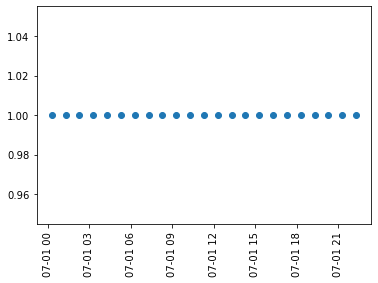

TAG_CONV_SETPOINT_ASP


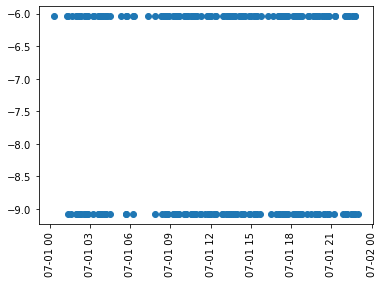

TAG_CONV_SETPOINT_COND


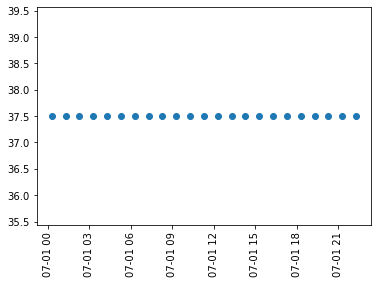

TAG_CONV_SONDA_ASP


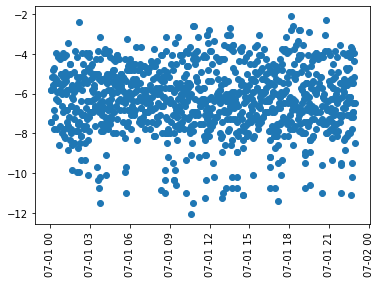

TAG_CONV_SONDA_COND


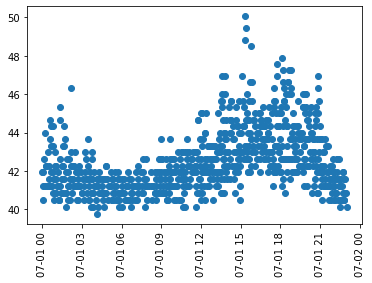

TAG_PASOMANUAL


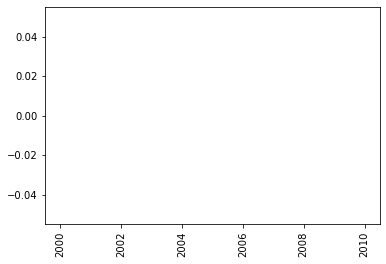

TAG_PASOMANUAL_AVERIA


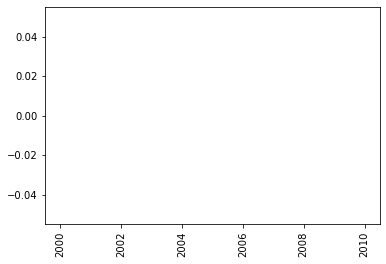

TAG_PASOMANUAL_MTTO


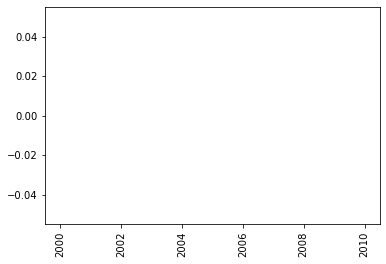

TAG_POTENCIA_COMP1


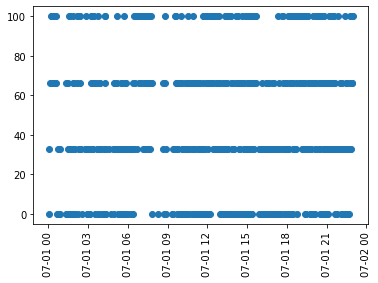

TAG_POTENCIA_COMP2


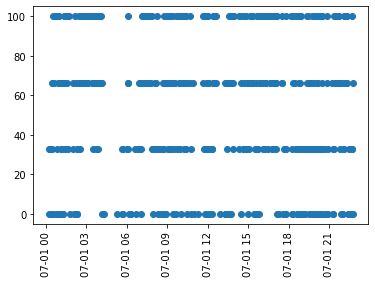

TAG_POTENCIA_COMP3


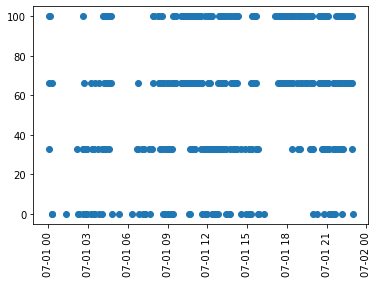

TAG_POTENCIA_COMP4


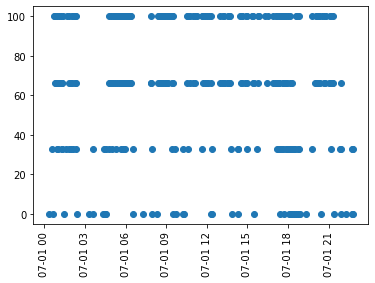

TAG_POTENCIA_COMP5


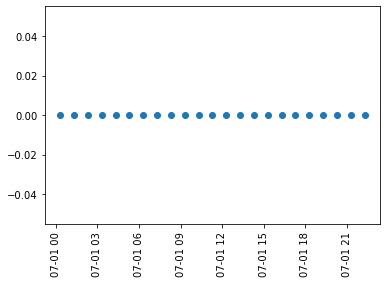

TAG_POTENCIA_COMP6


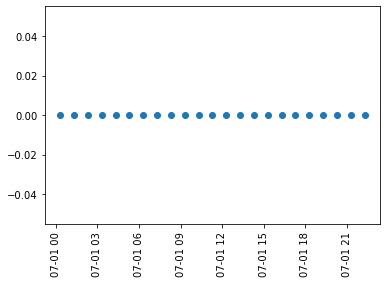

TAG_POTENCIA_INVERTER


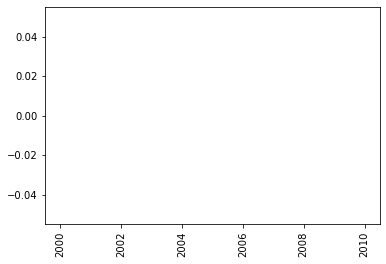

TAG_SETPOINT_ASP


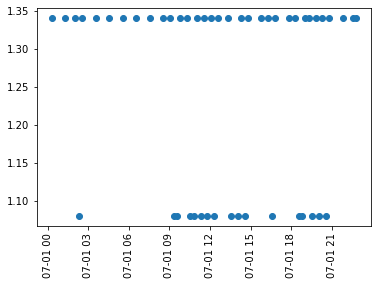

TAG_SETPOINT_COND


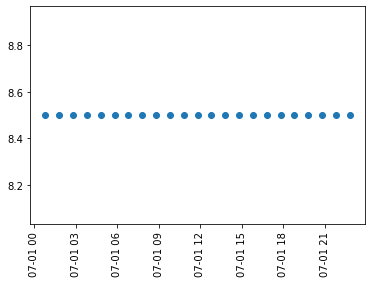

TAG_SONDA_ASP


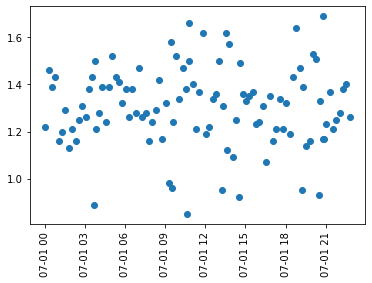

TAG_SONDA_COND


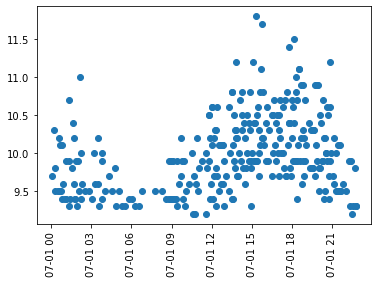

TAG_SONDA_TEMP_EXT


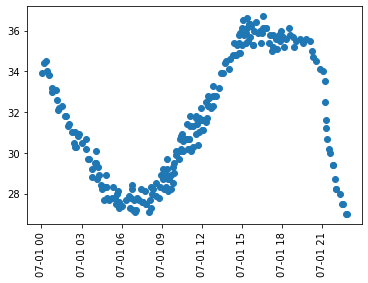

TAG_SONDA_TEMP_SUBENF


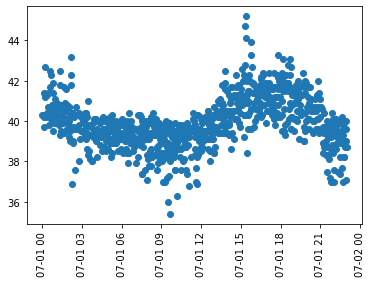

TAG_VENTILADOR1


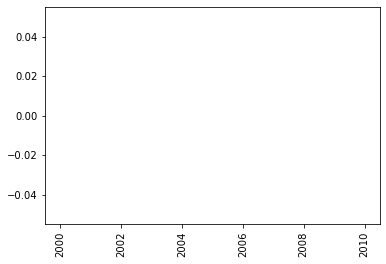

TAG_VENTILADOR2


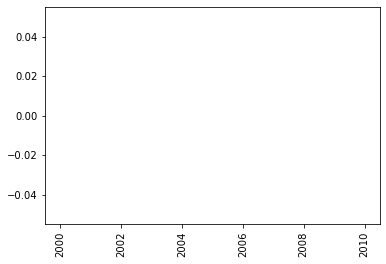

TAG_VENTILADOR3


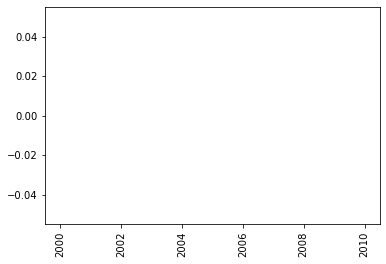

In [8]:
import os
# Draw the plot_date with 
mask = df_Central.loc[(df_Central['TS'] > '2019-07-01 00:00:00') & (df_Central['TS'] <= '2019-07-01 23:00:00')]
mask= mask.loc[(mask['NAME_CENTRO'] == 'C4148 C/ Rioja Coslada Madrid')]

mask = mask.sort_values('TS')

plt.xticks(rotation=90)

#load the colums in a dataframe
cols=list(df_Central.columns)

#Path
#mypath= os.path.abspath(__file__)
mypath = os.getcwd()

# Drawing the plots
i=3
while i <= (len(cols) - 3):
        
#    plt.plot_date(df_Variables[cols[i]].dropna(), vert=False)
    print(cols[i])
    plt.plot_date(mask['TS'], mask[cols[i]])
    plt.xticks(rotation=90)
    plt.show()
    # add to iteration counter
    i += 1

In [ ]:
TAG_CONV_SONDA_COND = df_central.loc[(df_central['TAG_CONV_SONDA_COND'] <-500) ]
TAG_POTENCIA_COMP1 = df_central.loc[(df_central['TAG_POTENCIA_COMP1'] <-500) ]
TAG_POTENCIA_COMP2 = df_central.loc[(df_central['TAG_POTENCIA_COMP2'] <-500) ]
TAG_POTENCIA_COMP3 = df_central.loc[(df_central['TAG_POTENCIA_COMP3'] <-500) ]
TAG_POTENCIA_COMP4 = df_central.loc[(df_central['TAG_POTENCIA_COMP4'] <-500) ]
TAG_POTENCIA_COMP5 = df_central.loc[(df_central['TAG_POTENCIA_COMP5'] <-500) ]
TAG_POTENCIA_COMP6 = df_central.loc[(df_central['TAG_POTENCIA_COMP6'] <-500) ]
TAG_SETPOINT_ASP = df_central.loc[(df_central['TAG_SETPOINT_ASP'] <-500) ]
TAG_SETPOINT_COND = df_central.loc[(df_central['TAG_SETPOINT_COND'] <-500) ]
TAG_SONDA_ASP = df_central.loc[(df_central['TAG_SONDA_ASP'] <-500) ]
TAG_SONDA_COND = df_central.loc[(df_central['TAG_SONDA_COND'] <-500) ]
TAG_SONDA_TEMP_EXT = df_central.loc[(df_central['TAG_SONDA_TEMP_EXT'] <-500) ]
TAG_SONDA_TEMP_SUBENF = df_central.loc[(df_central['TAG_SONDA_TEMP_SUBENF'] <-500) ]


In [ ]:
print(TAG_CONV_SONDA_COND['ID_LOCATION'].unique())
print(TAG_POTENCIA_COMP1['ID_LOCATION'].unique())
print(TAG_POTENCIA_COMP2['ID_LOCATION'].unique())
print(TAG_POTENCIA_COMP3['ID_LOCATION'].unique())
print(TAG_POTENCIA_COMP4['ID_LOCATION'].unique())
print(TAG_POTENCIA_COMP5['ID_LOCATION'].unique())
print(TAG_POTENCIA_COMP6['ID_LOCATION'].unique())
print(TAG_SETPOINT_ASP['ID_LOCATION'].unique())
print(TAG_SETPOINT_COND['ID_LOCATION'].unique())
print(TAG_SONDA_ASP['ID_LOCATION'].unique())
print(TAG_SONDA_COND['ID_LOCATION'].unique())
print(TAG_SONDA_TEMP_EXT['ID_LOCATION'].unique())
print(TAG_SONDA_TEMP_EXT['ID_LOCATION'].unique())